#**Laboratorio 14: Solución de un problema de clasificación**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

 **Nombres de los integrantes**


1.   Paola Andrea Campiño 202020785
2.   Isabella Contreras 202011871


*Grupo 5*

# **Introducción**

En esta práctica se busca aplicar los conceptos de aprendizaje supervisado para resolver un problema de clasificación binaria a través de la regresión logística. :

- Preprocesamiento de los datos
- Partición de los datos
- Selección de hiperparámetros
- Entrenamiento del modelo
- Evaluación del modelo

# **Guía para solucionar un problema de clasificación**

Como ejemplo, se usarán los datos de cáncer de seno del laboratorio anterior para crear una guía para atacar un problema de clasificación desde cero usando herramientas en librerías de Python para realizarlo de forma automática.

# *Preprocesamiento de los datos*
Primero, es necesario estandarizar los datos para que las características queden en los mismos órdenes de magnitud. Para esto, se pueden usar algunas funciones de la librería `sklearn`:

- **StandardScaler:** Hace que la **media** sea igual a 0 y escala los datos a la varianza unitaria (1). Los datos quedan en un rango que aproximadamente varía entre -1 y 1.
- **MinMaxScaler:** escala todas las características de datos en el rango [0, 1] o en el rango [-1, 1] si hay valores negativos en el conjunto de datos.


En este caso, se usará `StandardScaler`, donde la forma de usarla es la siguiente:

```
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Aquí, $X$ es el arreglo de observaciones.

[Text(0.5, 1.0, 'Standardized'),
 Text(0.5, 0, 'Feature 1'),
 Text(0, 0.5, 'Feature 2')]

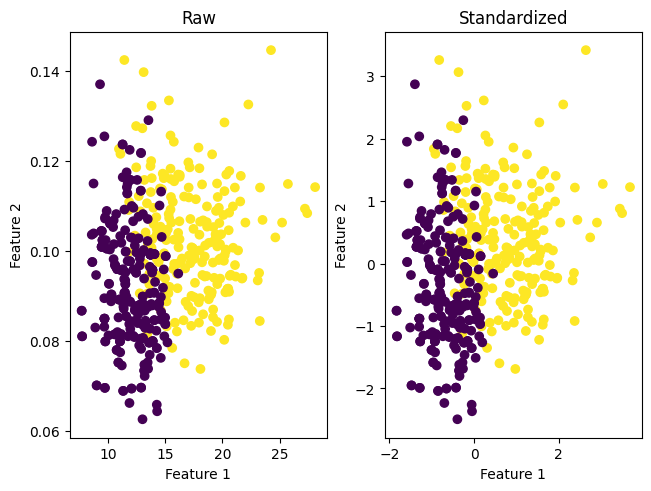

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Breast_Cancer_Train.csv') # Importar los datos del archivo CSV
X = df.drop(['pronostic'], axis = 1).to_numpy() # Extracción del arreglo de observaciones
y = df['pronostic'].to_numpy() # Extracción del arreglo de etiquetas

def scalerFun(X):
  scaler = StandardScaler() # Creación del escalador
  X_scaled = scaler.fit_transform(X) # Estandarización
  return X_scaled
X_new = scalerFun(X)

fig, ax = plt.subplots(1,2, layout = 'constrained')
ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set(title = 'Raw',xlabel = 'Feature 1', ylabel = 'Feature 2')

ax[1].scatter(X_new[:,0],X_new[:,1],c=y)
ax[1].set(title = 'Standardized',xlabel = 'Feature 1', ylabel = 'Feature 2')


# **Partición de los datos**

Este conjunto de datos contiene 469 observaciones. Depende de cada investigador asignar el porcentaje de entrenamiento y de prueba. Para dividir los datos, se usa la función `train_test_split` de la librería `sklearn.model_selection`, la cual recibe las observaciones y sus respectivas etiquetas, además del porcentaje de prueba, y devuelve los datos particionados de forma aleatoria. En este caso se usará 75\% de los datos para entrenamiento y el 15\% para prueba. Aquí, asignarle un número fijo a `random_state` nos asegura que la partición aleatoria sea la misma en cada corrida de esta rutina.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.15,random_state = 42) # División del set de datos con 42 veces de reordenamiento

# **Selección de hiperparámetros**

La sintonización de los hiperparámetros es fundamental debido a que potencialmente puede convertir un modelo con un terrible desempeño en uno excelente. Esto se logra al probar todas las posibles combinaciones para diversos valores de hiperparámetros. En este caso, se usa la función `GridSearchCV` de la librería `sklearn.model_selection`, la cual realiza una sintonización usando una validación cruzada sobre los datos de la partición de entrenamiento. Ésta recibe el modelo a sintonizar, los datos de la partición de entrenamiento, el conjunto de posibles valores para los hiperparámetros, y la cantidad de *folds* o particiones $K$. El modelo, el cual es de regresión logística, se define de la siguiente forma::
```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 'número de iteraciones máximas')
```
Es importante modificar el número de iteraciones máximas para evitar problemas de covergencia y mejorar el desempeño de la sintonización. Por otro lado, los valores para los hiperparámetros se deben definir en un conjunto de la siguiente forma:

```
parameter_space = {'solver': ['solver_1','solver_2',...,'solver_n'], 'C': [C_1,C_2, ..., C_m] }
```
Hay que notar que este conjunto varía de acuerdo al modelo de clasificación, por lo que es necesario leer la documentación de cada modelo. En este caso, como se trata de regresión logística, solo se puede variar el método de búsqueda pra resolver el problema de optimización (lo llaman solver) y la constante se regularización. Es importante aclarar que esta función usa el inverso del parámetro $c$ visto en clase. Es decir, usa $\frac{1}{C}$ para sintonizar. Los solvers 'lbfgs', 'liblinear', 'newton-cg' son variaciones de los métodos de descenso de gradiente y Newton vistos en clase. Para este caso, se usaron los siguientes posibles hiperparámetros:
```
'solver': ['lbfgs','liblinear','newton-cg']
'C': np.linspace(1/1000,1,100)
```
Esto quiere decir que se van a probar de forma automática diferentes combinaciones de métodos de optimización y el parámetro de regularización. Luego, la función de `GridSearchCV`, con $K=3$, se usaría de la siguiente forma:

```
clf = GridSearchCV(model, parameter_space, cv = 3)
clf.fit(X_train, y_train)
```

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(max_iter=100000) # Creación del modelo de regresión logística
parameter_space = {'solver': ['lbfgs','liblinear','newton-cg'], 'C': np.linspace(1/1000,1,100) } # Creación del conjunto de parámetros
clf = GridSearchCV(model, parameter_space, cv = 3) # Creador de la grilla
clf.fit(X_train, y_train) # Aplicación de Grid Search en los datos de entramiento

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.2...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

Posteriormente, se deben revisar los resultados de sintonización. Para esto, se obtiene la mejor combinación de hiperparámetros así:

```
clf.best_params_
```
También, este tiene diferentes métricas como, por ejemplo, la precisión (accuracy). La forma de obtenerla es:

```
clf.cv_results_['mean_test_score']
```

Una forma útil de revisar las mejores combinaciones de los hiperparámetros y el respectivo accuracy es através de la librería `seaborn`. La forma de hacelo sería la siguiente:


```
import seaborn as sns
hyperpar = clf.cv_results_['params']
Model = pd.DataFrame(hyperpar)
Model['Accuracy'] = clf.cv_results_['mean_test_score']
Model["Parameters"] =   Model["solver"] + ' ' + Model['C'].apply(str)
sns.scatterplot(data=Model, x=Model.index, y="Accuracy", hue="Parameters", s=40).set(title='Accuracy of the Different Models | Grid Search')
```




Best parameters found:
 {'C': 0.5660909090909091, 'solver': 'liblinear'}


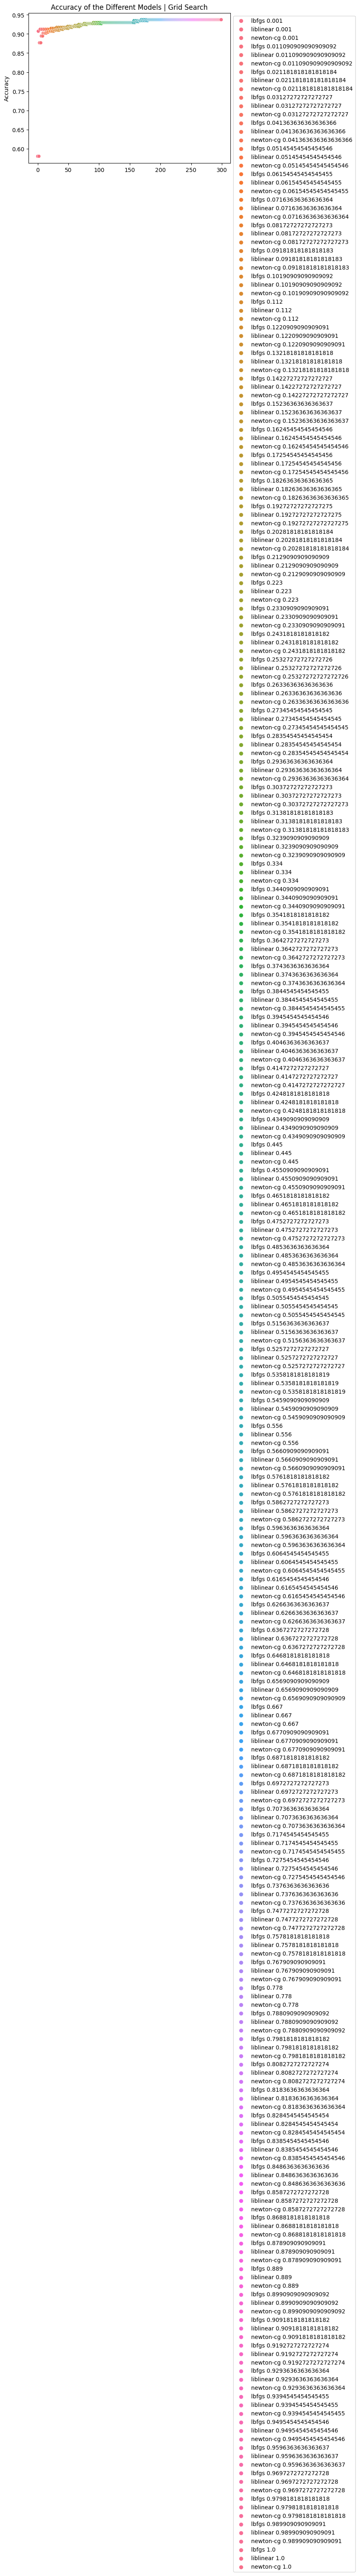

In [11]:
import seaborn as sns
print('Best parameters found:\n', clf.best_params_)


hyperpar = clf.cv_results_['params'] # Obtención de los hiperparámetros sintonizados

Model = pd.DataFrame(hyperpar) # Conversión de los resultados en un dataframe

means = clf.cv_results_['mean_test_score'] # Obtención de resultados del score

Model['Accuracy'] = means # Asignación de los resultados del score

Model["Parameters"] = Model["solver"] + ' ' + Model['C'].apply(str) # Aignación de las leyendas para cada combinación

sns.scatterplot(data=Model, x=Model.index, y="Accuracy", hue="Parameters", s=40).set(title='Accuracy of the Different Models | Grid Search') # Creación del gráfico
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

En este caso, la mejor combinación fue de $C=0.566$ con solucionador *liblinear*. Para alcanzar un accuracy cercana a $0.94$ de la validación cruzada. Este solucionador es una versión modificada del método de Newton ya implementado anteriormente.




# **Entrenamiento del modelo**

Ahora, ya teniendo los mejores hiperparámetros del modelo mediante la validación cruzada, podemos entrenamer el modelo de la misma manera que en el laboratorio anterior:
```
model = LogisticRegression(max_iter = 1000, C = 0.566, solver = 'liblinear')
model.fit(X_train,y_train)
```
donde se deben incluir los parámetros sintonizados. La predicción de las etiquetas de los datos de prueba se obtienen de la siguiente forma:

```
model.predict(X_test)
```

Luego, para obtener los coeficientes $w$ y el intercepto $b$ sería:

```
w = model.coef_.flatten()
b = model.intercept_
```

En este caso, como tenemos dos características, podemos hacer una inspección visual de la recta separadora. Esto no lo podemos hacer cuando tenemos más de dos características:



[Text(0.5, 0, 'Feature 1'), Text(0, 0.5, 'Feature 2')]

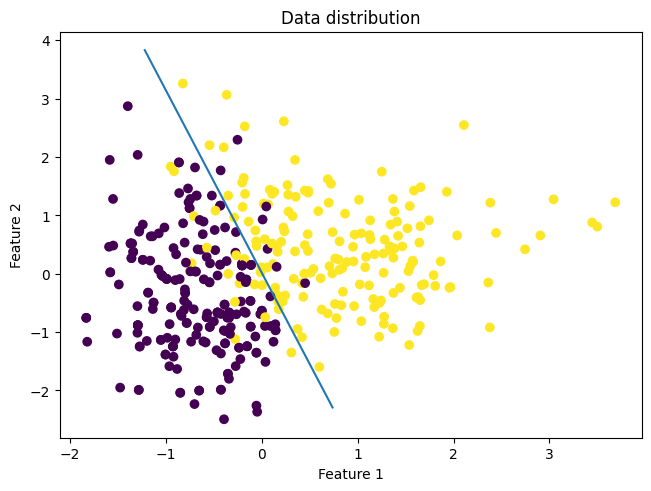

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,f1_score, confusion_matrix

model = LogisticRegression(max_iter = 10000, C = 0.566, solver = 'liblinear') # Creación del modelo con los hiperparámetros sintonizados

model.fit(X_train,y_train) # Entrenamiento del modelo

w = model.coef_.flatten() # Obtención de los coeficientes

b = model.intercept_ # Obtención del intercepto

# Gráfico del resultado
fig , ax= plt.subplots(layout='constrained')
x1 = np.linspace(min(X_train[:,0])/1.5,max(X_train[:,0])/5,10)
x2 = -(b+w[0]*x1)/w[1]
ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax.plot(x1,x2)
ax.set_title('Data distribution')
ax.set(xlabel='Feature 1', ylabel = 'Feature 2')

# **Evaluación del modelo**

Una vez entrenado el clasificador, es necesario evaluar su desempeño con los datos de prueba. Para esto se pueden usar métricas dadas por la misma librería `sklearn.metrics`, tales como:

- `accuracy_score`: Calcula el porcentaje de aciertos.
- `confusion_matrix`: Muestra la siguiente matriz:
\begin{align*}
  \begin{bmatrix}
    TN & FP \\
    FN & TP
  \end{bmatrix}
\end{align*}

Donde


> $TN$ son los datos con clase $0$ clasificados como clase $0$

> $FP$ son los datos con clase $0$ clasificados como clase $1$

> $FN$ son los datos con clase $1$ clasificados como clase $0$

> $TP$ son los datos con clase $1$ clasificados como clase $1$


Las predicciones con los datos de prueba se obtienen como:

```
y_pred = model.predict(X_test)
```


Luego, cada métrica se usa de la siguiente forma:

```
'metric name'(y_test, y_pred)
```


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = model.predict(X_test) # Predicción de las clases

print(f'Balanced accuracy Score :  {accuracy_score(y_test,ypred)}') # Score de balanced accuracy
print(f'Confusion matrix: \n{(confusion_matrix(y_test,ypred))}') # Confusion matrix

Balanced accuracy Score :  0.8309859154929577
Confusion matrix: 
[[33  3]
 [ 9 26]]


# **Ejercicio**

Una empresa desea determinar la calidad de vino rojo en un proceso automatizado. Para eso, se miden las siguientes 11 variables en el líquido que se consideran dan información sobre la calidad de un vino:  acidez fija, acidez volátil, acides cítrica, azúcar residual, nivel de cloruro, dióxido de sulfuro libro, dióxido de sulfuro total, densidad, pH, sulfatos, y alcohol. La base de datos *wine_quality.csv* contiene observaciones etiquetadas donde $0$ indica que el vino no es de calidad, y $1$ de lo contrario. Usando las herramientas que ofrece la librería `sklearn`, encuentre un clasificador preciso que determine de forma automática si la calidad de un vino es buena o mala basada en las 11 características de una muestra. Con esto, se espera que se sigan todos los pasos mostrados, analizando cada resultado y explicando cada herramienta que se use.



## **Importar librerias:**


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



## **Importar Datos:**

Se importa los datos del csv wine_quality.



In [15]:
df = pd.read_csv('wine_quality.csv') # Importar los datos del archivo CSV
df.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0          10            8.1              0.27         0.41            1.45   
1          11            8.6              0.23         0.40            4.20   
2          12            7.9              0.18         0.37            1.20   
3          14            8.3              0.42         0.62           19.25   
4          19            6.5              0.31         0.14            7.50   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.033                 11.0                  63.0   0.9908  2.99   
1      0.035                 17.0                 109.0   0.9947  3.14   
2      0.040                 16.0                  75.0   0.9920  3.18   
3      0.040                 41.0                 172.0   1.0002  2.98   
4      0.044                 34.0                 133.0   0.9955  3.22   

   sulphates  alcohol  quality  
0       0.56     12.0        0  
1       0.53      9.7        0  
2       0.63     10.8        0  
3       0.67      9.7        0  
4       0.50      9.5        0

In [16]:
def graf_all_features(X, y):
    n_features = len(X[0])

    fig, ax = plt.subplots(n_features, n_features, figsize=(20, 20))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i in range(n_features):
        for j in range(n_features):
            if i == 0:
                ax[i, j].set_title(str(df.columns[j+1]), fontsize=8)
            if j == 0:
                ax[i, j].set_ylabel(str(df.columns[i+1]), fontsize=8, rotation=0, ha='right')

            ax[i, j].scatter(X[:, i], X[:, j], c=y, s=10)

    plt.show()


## **Grafica correlación: Entre caracteristicas con datos sin estandarizar**
Se realiza una grafica para verificar cuales modelos podrian llegar  atener una una distribución más exacta que permita en efecto evidenciar factores quie afecte la calidad del vino.

- Cabe resaltar que como no está estandarizado es posible que siertas caracteristicas puedan llegar a tener una mayor importancia, al menos en las graficas.

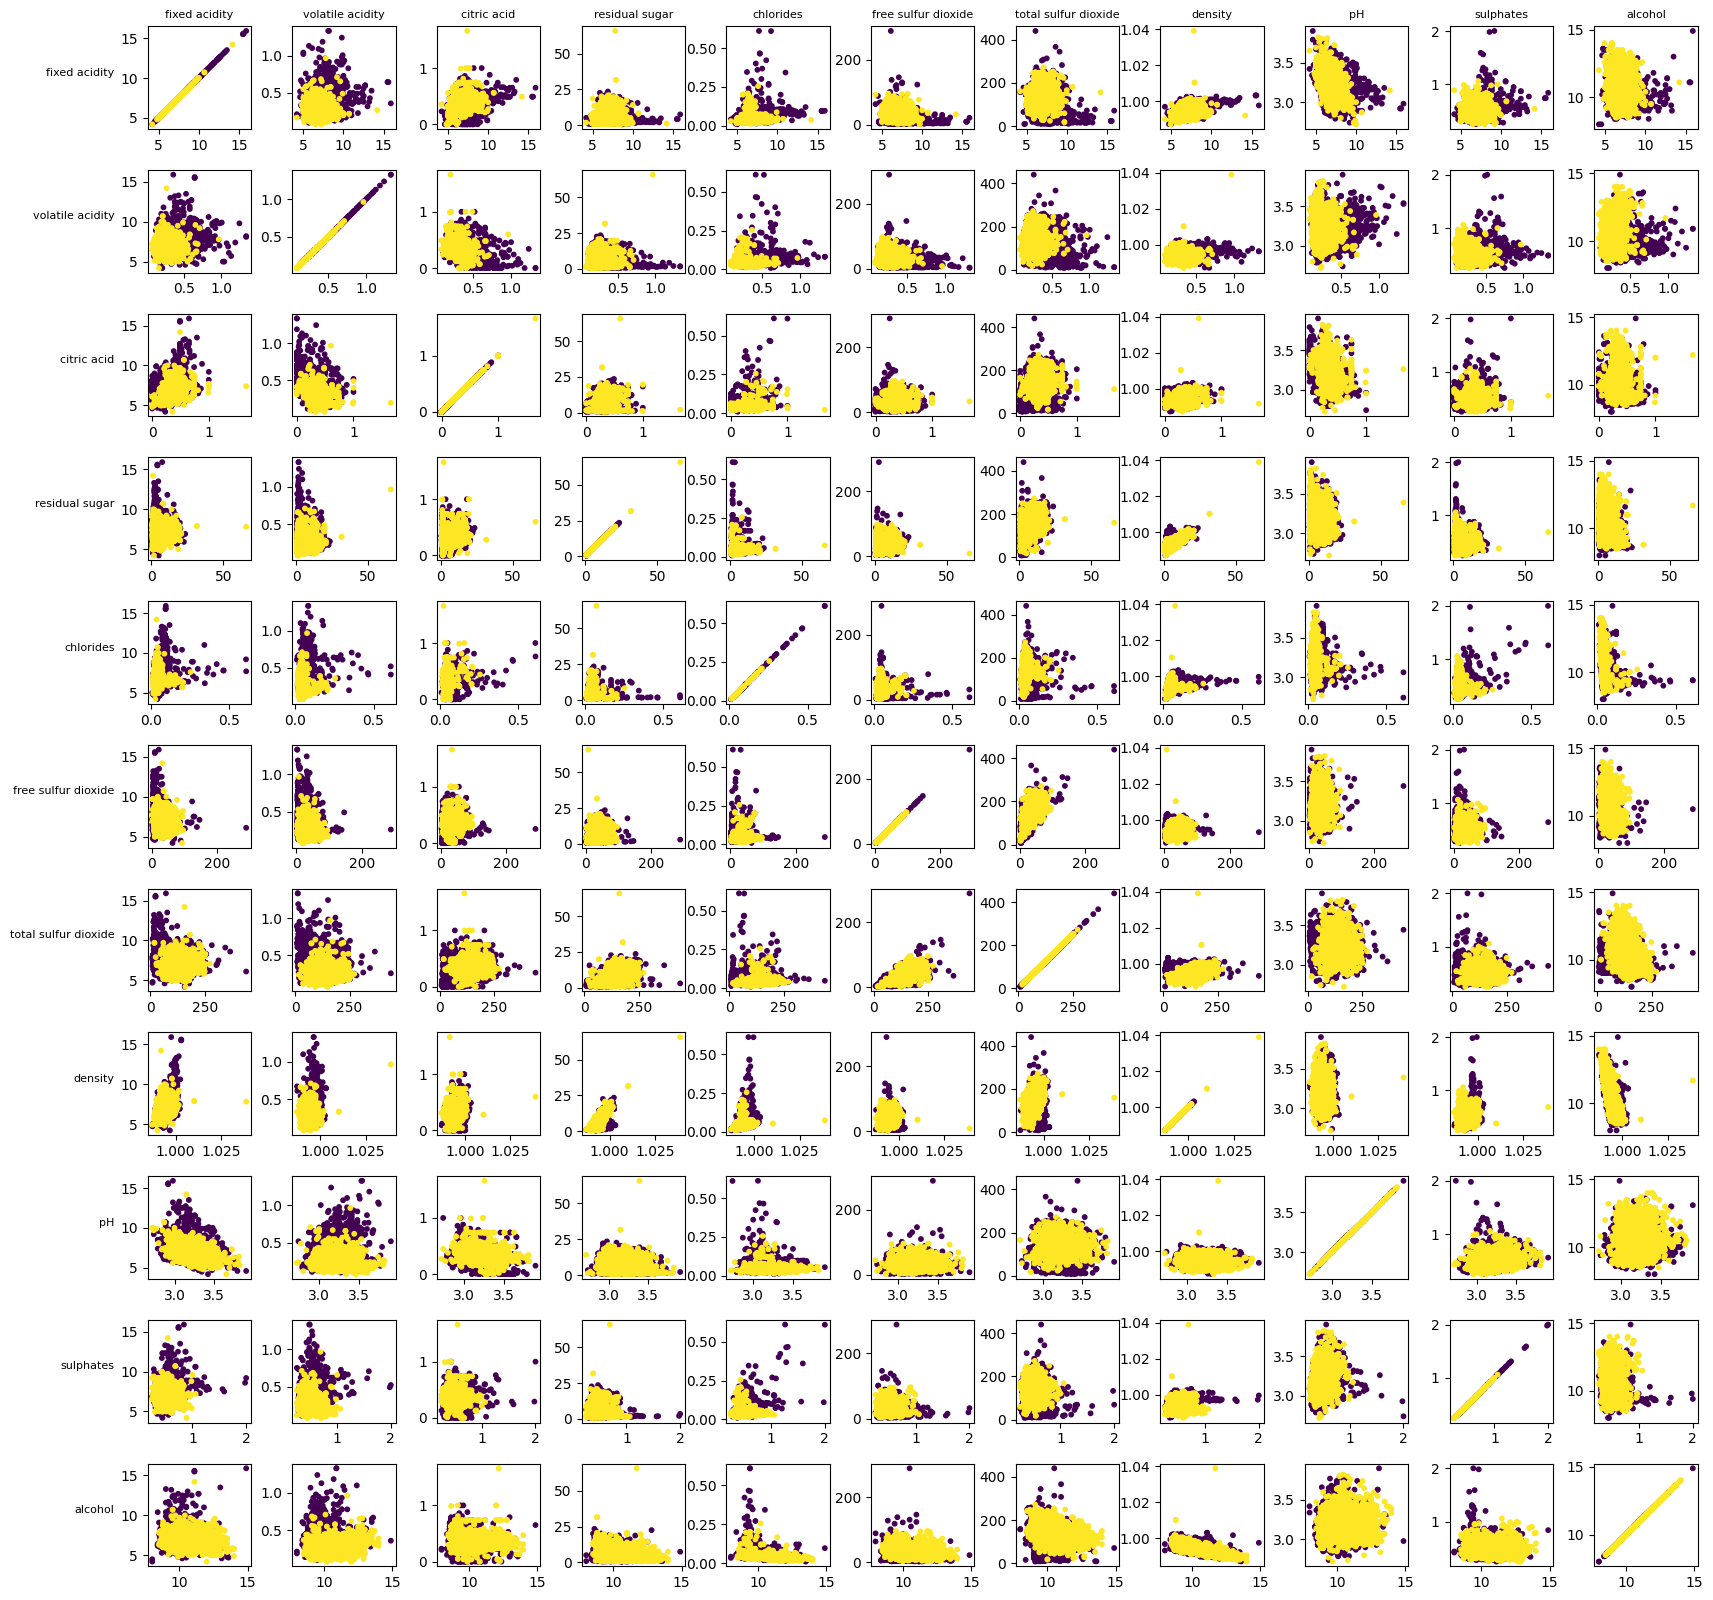

In [17]:
X = df.drop(['quality'], axis = 1).to_numpy()
y = df['quality'].to_numpy()
graf_all_features(X[:,1:],y)

## **Estandarización de los datos:**

En vista a que en los datos se quiere dar en evidencia que ciertas caracteristicas no tienen mayor importancia que otras se optado por estandarizar.

En este caso se seleccionado  StandarScaler, ya que en su mayoria de caracteristicas se piensa que siguen una distribución normal.

Cabe resaltar que MinMaxEscaler se recomienda usar cuando la distribución No es gaussiana (normal) o cuando los datos tiene un rango establecido. Con standarScaler se recomienda cuando se usa una distribución gaussiana.

Información recuperada de:

https://vitalflux.com/minmaxscaler-standardscaler-python-examples/


In [36]:

def scalerFun(X):
  scaler = StandardScaler() # Creación del escalador
  X_scaled = scaler.fit_transform(X) # Estandarización
  return X_scaled
X_new = scalerFun(X[:,1:])
print(X_new)

[[ 0.91749824 -0.27484691  0.53404593 ... -1.38656532  0.42418358
   1.6033787 ]
 [ 1.38509071 -0.55787511  0.46024956 ... -0.42119227  0.19392017
  -0.48708481]
 [ 0.73046126 -0.91166036  0.23886042 ... -0.16375945  0.96146488
   0.51270208]
 ...
 [-0.85935312 -0.55787511  0.16506405 ...  0.15803157 -0.57362454
  -1.30509227]
 [ 0.07583181  0.07893833  0.46024956 ... -0.03504304 -0.26660665
   0.14914321]
 [-1.23342709  0.57423768  0.9768242  ...  1.12340463 -0.4201156
   3.42117305]]


## **Grafica correlación: Entre caracteristicas con datos estandarizados**
La siguiente grafica se puede visualizar la correlación entre las diferentes caracteristicas. La grafica se ha hecho con la estandarización usando standar scaler.

Conclusiones en base a la grafica:

- Las relación con sigo mismo siempre es lineal, en muchos casos se puede ver una separación en cuanto a calidad.
- Hay muchos casos en los que la relación entre 2 caracteristicas, dejan en claro algunas separaciones entre grupos.
- Hay ciertos casos casos e los que la seperación se ve que no es lineal y por lo tanto debería considerarse otra forma de clasificar los datos eso pasa con PH vs residual Ph con todas las otras caracteristicas.

- Se considera que estas fronteras no tan claras podrian llegar a afectar el modelo.





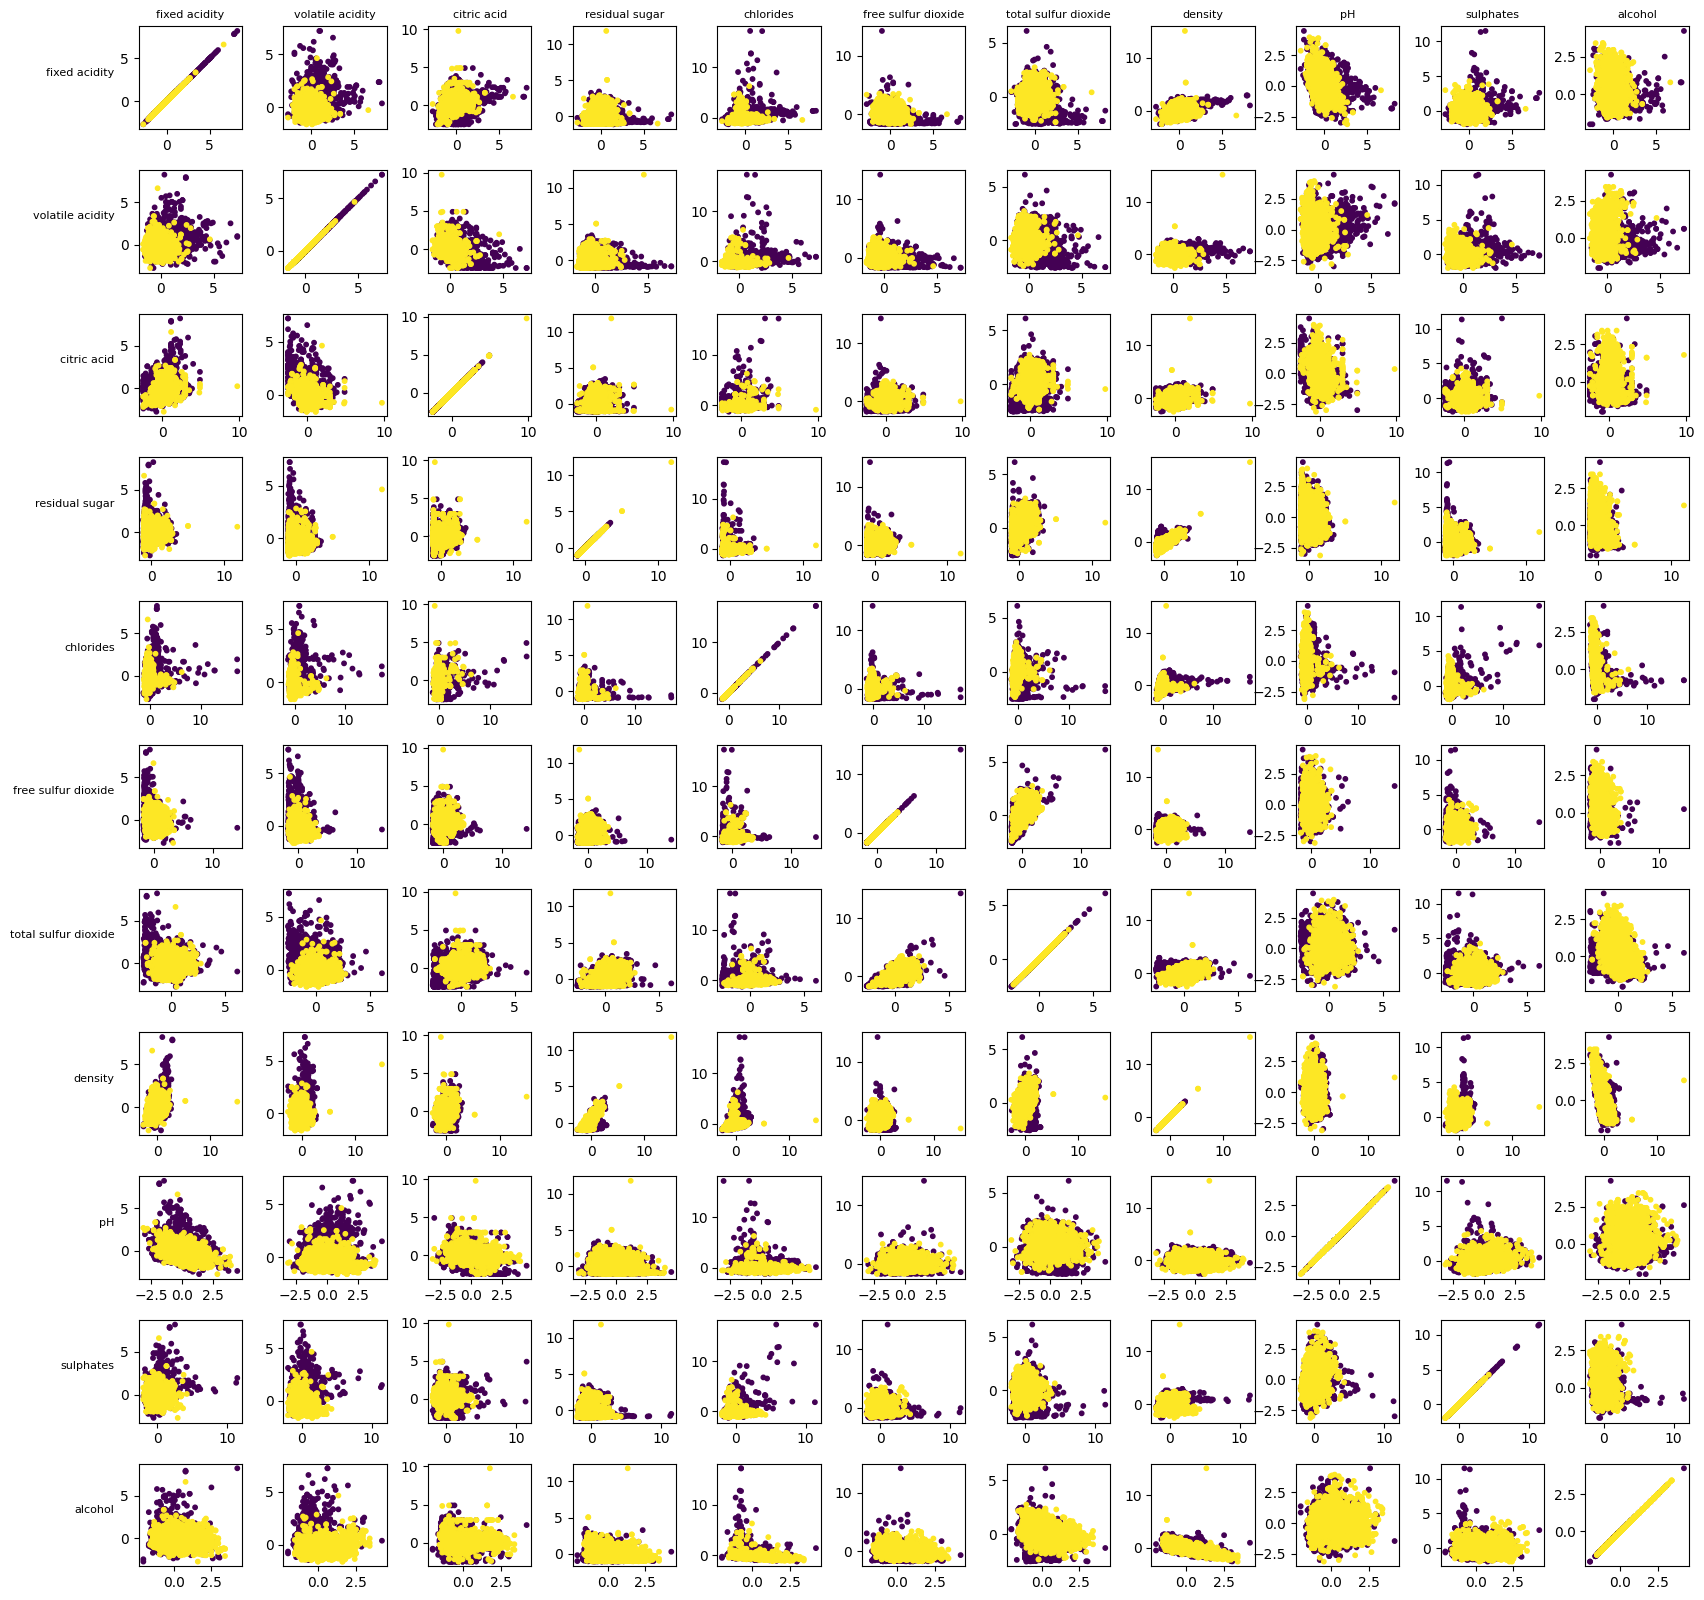

In [37]:
graf_all_features(X_new,y)

## **Partición de datos**
se va a usar una proporción de 80:20. Donde 80 son para entrenamiento y 20 son para test (verificación).

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.20,random_state = 80)

## **Selección de hiperparametros: Para cada combinación de caracteristicas**

Para verificar cual es la mejor combinación de hiperparametros, en donde se quiere saber cual es la mejor combinación entre solver y C  que se refiere a al regularización.

En base a las pruebas realizadas como resultado se va a obtener la mejor combinación de parametros, que en este caso resulto con los hiperparametros : {'C': 0.9495454545454546, 'solver': 'lbfgs'}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(max_iter=1000) # Creación del modelo de regresión logística
parameter_space = {'solver': ['lbfgs','liblinear','newton-cg'], 'C': np.linspace(1/1000,1,100) } # Creación del conjunto de parámetros
clf = GridSearchCV(model, parameter_space, cv = 3) # Creador de la grilla
clf.fit(X_train, y_train)
hiper_params=clf.best_params_


In [40]:
clf.best_params_

{'C': 0.06154545454545455, 'solver': 'lbfgs'}

In [41]:
n_features = len(X_train[0])
matriz_intercept=[[0] * n_features for i in range(n_features)]
def graf_log_reg():


    fig, ax = plt.subplots(n_features, n_features, figsize=(20, 20))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i in range(n_features):
        for j in range(n_features):
            if i == 0:
                ax[i, j].set_title(str(df.columns[j+1]), fontsize=8)
            if j == 0:
                ax[i, j].set_ylabel(str(df.columns[i+1]), fontsize=8, rotation=0, ha='right')

            ax[i, j].scatter(X_train[:, i], X_train[:, j], c=y_train, s=10)
            model = LogisticRegression(max_iter = 10000, C = hiper_params['C'], solver = hiper_params['solver']) # Creación del modelo con los hiperparámetros sintonizados
            model.fit(X_train,y_train)
            w = model.coef_.flatten()
            b = model.intercept_
            matriz_intercept[i][j]=[w,b]
            x1 = np.linspace(min(X_train[:,i]),max(X_train[:,j]),10)
            x2 = -(b+w[i]*x1)/w[j]
            ax[i,j].plot(x1,x2)



    plt.show()


# Grafica con regresión:

Las graficas a continuación dan evidencia un poco de la exactitud del modelo. En ciertos casos graficamente se ve que tiene mucho sentido la separación graficada. En otros no tato, sin embargo es posible que sea debido a que no todos deben ser separados por una recta.

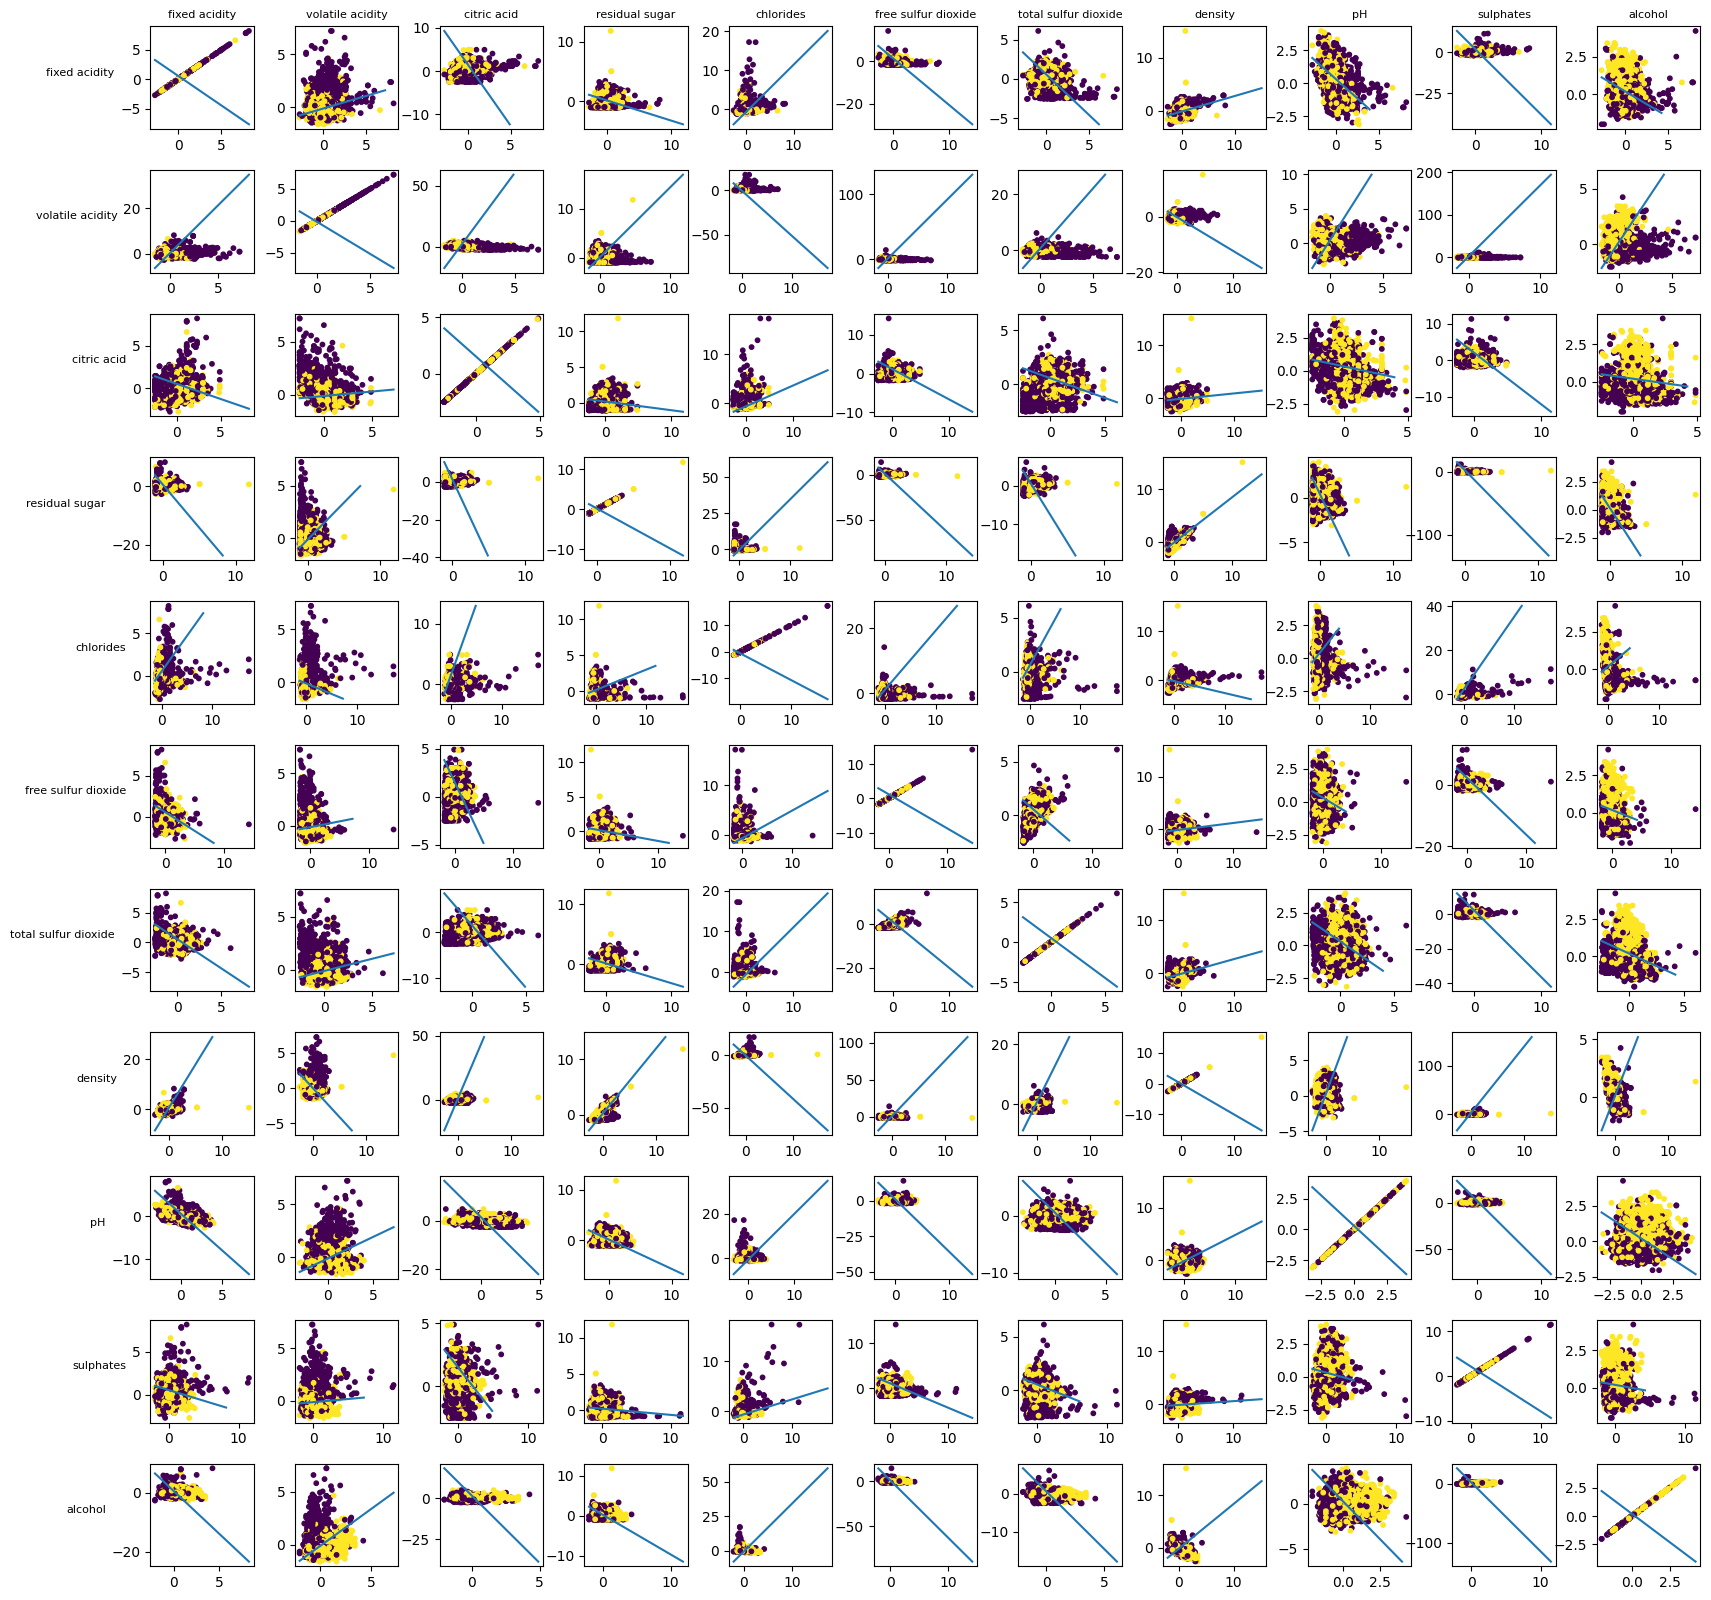

In [42]:
 graf_log_reg()

## **Evaluar modelo**

Ante la evalción de un modelo se ha llegado a una exactitud de 0.75.

En cuanto a la matriz de confusión se puede evidenciar que:

- Verdaderos positivos (TP): 308
- Falsos positivos (FP): 108
- Verdaderos negativos (TN): 293
- Falsos negativos (FN): 91

lo que signfica que en su mayoría las predicciones están bien. En cuanto a las predicciones incorrectas se puede evidenciar que tiende a ser balanceado, no hay tendencia a ser más positivo que negativo, pero si suele ser positivo (buena calidad) equivocadamente.

In [45]:

model = LogisticRegression(max_iter = 10000, C = hiper_params['C'], solver = hiper_params['solver']) # Creación del modelo con los hiperparámetros sintonizados
model.fit(X_train,y_train)


y_pred = model.predict(X_test)


In [44]:

from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Balanced accuracy Score :  {accuracy_score(y_test,y_pred)}') # Score de balanced accuracy
print(f'Confusion matrix: \n{(confusion_matrix(y_test,y_pred))}') # Confusion matrix

Balanced accuracy Score :  0.75125
Confusion matrix: 
[[293 108]
 [ 91 308]]


# **Entregable**

Se debe entregar este notebook con el ejercicio solucionado y un archivo .csv que incluya el vector de coeficientes $w$ y el intercepto $b$, todo en una misma fila, donde las primeras 11 columnas corresponden a los coeficientes $w_i$ y la última columna (12) corresponde al intercepto $b$.

In [96]:

def guardar_csv(datos=matriz_intercept[0][0], nombre_archivo="predictions.csv"):
    datos_list=[[0] * 12 for i in range(2)]

    for i in range(0, len(datos[0])):

        datos_list[0][i]="w"+str(i)
        datos_list[1][i]=float(datos[0][i])


    datos_list[0][11]="b"
    datos_list[1][11]=(datos[1][0])

    np.savetxt(nombre_archivo, datos_list, delimiter=',', fmt='%s')

guardar_csv()

In [97]:
data_vi = pd.read_csv("predictions.csv", sep=";")
print(data_vi.head())
print(len(data_vi))

                 w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b
0  0.20229160191714776,-0.8454699843262656,0.0716...
1
